In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [8]:
#import summer olympics data
oly_df = pd.read_csv("guardian_summer_olympics.csv")
oly_df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [11]:
#Determine how many times countries have hosted olympics
#FYI: There have been 28 summer olympics since the start of the games, 27 are included in dataset

games_df = oly_df[["Year", "City"]]
years_group = games_df.groupby(["Year"])

host_df = pd.DataFrame(years_group["City"].first())

#add country name that correlates with each year. Just did it manually since there's only 27 in the list
host_countries= ["Greece", "France", "USA", "UK", "Sweden", "Belgium", "France", "Netherlands", "USA", "Germany", "UK", "Norway", "Australia/Sweden", "Italy", "Japan", "Mexico", "Germany", "Canada", "Russia", "USA", "South Korea", "Spain", "USA", "Australia", "Greece", "China", "UK"]
host_df["Country"]=host_countries
host_df2 = pd.DataFrame(host_df["Country"].value_counts())
host_df2.reset_index()
host_df3 = host_df2.rename(columns={"index":"Country", "Country":"Times Hosted"})

#Consider the Host Effect in 5 different countries = USA, UK, Germany, France, Greece
years_df = host_df.reset_index()
years_df


host_df3

,Times Hosted
USA,4
UK,3
France,2
Germany,2
Greece,2
Australia,1
Canada,1
Mexico,1
Sweden,1
Australia/Sweden,1


In [12]:
#Figure out which countries are the top medal winners
#Create a Table that shows TOTAL medal counts per country (ALL TIME)

#total medals count
total_df = oly_df.groupby(["Country"])
total_df2 = pd.DataFrame(total_df["Medal"].count())
total_df3 = total_df2.rename(columns={"Medal":"Total Medals"})

#gold medals count
gold_df = oly_df.loc[oly_df["Medal"] == "Gold"]
gold_country = gold_df.groupby(["Country"])
gold_df = pd.DataFrame(gold_country["Medal"].count())
gold_df2 = gold_df.rename(columns={"Medal": "Gold Medals"})


#silver medals count
silver_df = oly_df.loc[oly_df["Medal"] == "Silver"]
silver_country = silver_df.groupby(["Country"])
silver_df = pd.DataFrame(silver_country["Medal"].count())
silver_df2 = silver_df.rename(columns={"Medal": "Silver Medals"})


#bronze medals count
bronze_df = oly_df.loc[oly_df["Medal"] == "Bronze"]
bronze_country = bronze_df.groupby(["Country"])
bronze_df = pd.DataFrame(bronze_country["Medal"].count())
bronze_df2 = bronze_df.rename(columns={"Medal": "Bronze Medals"})


#merge dataframes to create table that shows all medals
merged_df1 = pd.merge(gold_df2, silver_df2, on='Country', how='outer')
merged_df2 = pd.merge(merged_df1, bronze_df2, on="Country", how = "outer")
merged_df3 = pd.merge(merged_df2, total_df3, on="Country", how="outer")
merged_df4= merged_df3.reset_index()
merged_df5= merged_df4.sort_values(by="Total Medals", ascending=False)
totmedals_df= merged_df5.head(15)



final_medals_df = totmedals_df.sort_values(by="Total Medals", ascending=True)
final_medals_df

,Country,Gold Medals,Silver Medals,Bronze Medals,Total Medals
13,CAN,155.0,232.0,262.0,649
73,RUS,239.0,238.0,291.0,768
49,JPN,213.0,272.0,303.0,788
15,CHN,290.0,296.0,221.0,807
35,GDR,329.0,271.0,225.0,825
60,NED,233.0,279.0,339.0,851
79,SWE,349.0,367.0,328.0,1044
41,HUN,412.0,316.0,351.0,1079
4,AUS,312.0,405.0,472.0,1189
47,ITA,476.0,416.0,404.0,1296


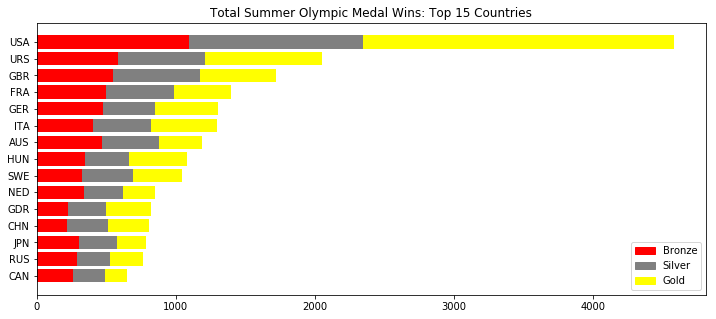

In [74]:
#Create a bar graph that shows Total wins per country

bar_1_bronze = final_medals_df["Bronze Medals"]
bar_2_silver = final_medals_df["Silver Medals"]
bar_3_gold = final_medals_df["Gold Medals"]
x_axis = final_medals_df["Country"]

plt.rcParams["figure.figsize"]=(12,5)
plt.barh(x_axis, bar_1_bronze, color="red")
plt.barh(x_axis, bar_2_silver, color="gray", left=bar_1_bronze)
plt.barh(x_axis, bar_3_gold, color="yellow", left=list(map(lambda x,y: x+y, bar_1_bronze, bar_2_silver)))

plt.title("Total Summer Olympic Medal Wins: Top 15 Countries")
plt.ylabel = ("Number of Medals")
plt.xlabel = ("Country")

#create legend
Bronze = mpatches.Patch(color="red", label="Bronze")
Silver = mpatches.Patch(color="gray", label="Silver")
Gold = mpatches.Patch(color="Yellow", label="Gold")
plt.legend(handles=[Bronze, Silver, Gold], loc = "lower right")



In [75]:
# What effect does the Number of Athletes have on medal wins? 
# Problem: Current dataset does not include participating ahtletes who LOST; it only includes winners. 
# So, we found another dataset that includes all athlets, created a dataframe and merged with existing

allath_df = pd.read_csv("kaggle_allathlete_olympics.csv")
summer_df = allath_df.loc[allath_df["Season"]=="Summer"]
exclude_2016 = summer_df.loc[summer_df["Year"] < 2015]

#Total athletes who participated per country, ALL TIME
total_df = exclude_2016.groupby(["NOC"])
total_df2 = pd.DataFrame(total_df["Name"].count())
total_df3 = total_df2.reset_index()
tot_athlete_df = total_df3.rename(columns={"NOC":"Country", "Name": "Total Number of Athletes"})
tot_athlete_df.he

,Country,Total Number of Athletes
0,AFG,123
1,AHO,74
2,ALB,57
3,ALG,465
4,AND,49


In [81]:
#merge medals dataframe with athelete count dataframe
all_totals_df = pd.merge(merged_df5, tot_athlete_df, on="Country", how="outer")
all_totals_df.head()

,Country,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Total Number of Athletes
0,USA,2235.0,1252.0,1098.0,4585.0,14345.0
1,URS,838.0,627.0,584.0,2049.0,4622.0
2,GBR,546.0,621.0,553.0,1720.0,10439.0
3,FRA,408.0,491.0,497.0,1396.0,10121.0
4,GER,452.0,378.0,475.0,1305.0,7086.0


In [ ]:
#plot the relationship between total medals and number of athletes using a scatter plot
x_medals = all_totals_df["Total Medals"]
y_athletes = all_totals_df

In [89]:
#Calculate ratio of medals per athlete. Closer to 100 = better at winning
percent = all_totals_df["Total Medals"]/all_totals_df["Total Number of Athletes"]*100

#add this to existing dataframe
all_totals_df["Percent Wins"] = percent
all_totals_df.head()

,Country,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Total Number of Athletes,Percent Wins
0,USA,2235.0,1252.0,1098.0,4585.0,14345.0,31.962356
1,URS,838.0,627.0,584.0,2049.0,4622.0,44.331458
2,GBR,546.0,621.0,553.0,1720.0,10439.0,16.476674
3,FRA,408.0,491.0,497.0,1396.0,10121.0,13.793103
4,GER,452.0,378.0,475.0,1305.0,7086.0,18.416596
